In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
img = X_train[20]

In [ ]:
img.shape

(28, 28)

In [ ]:
import matplotlib.pyplot as plt

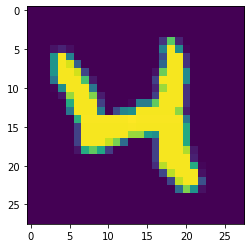

In [ ]:
plt.imshow(img)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train_hot = to_categorical(y_train, num_classes=10)

In [ ]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
y_train_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Reshape, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.losses import categorical_crossentropy

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(28, 28)))
model.add(Reshape(target_shape=(28, 28, 1)))
model.add(Conv2D(16, 3, padding="same"))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, padding="same"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(400, activation="tanh"))
model.add(Dense(200, activation="tanh"))
model.add(Dense(100, activation="tanh"))
model.add(Dense(10, activation="softmax"))

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(X_train, y_train_hot, epochs=10, batch_size=1000)

Epoch 1/10
60/60 [==============================] - 1s 13ms/step - loss: 0.0403 - accuracy: 0.9873
Epoch 2/10
60/60 [==============================] - 1s 11ms/step - loss: 0.0372 - accuracy: 0.9881
Epoch 3/10
60/60 [==============================] - 1s 11ms/step - loss: 0.0397 - accuracy: 0.9868
Epoch 4/10
60/60 [==============================] - 1s 11ms/step - loss: 0.0353 - accuracy: 0.9883
Epoch 5/10
60/60 [==============================] - 1s 11ms/step - loss: 0.0311 - accuracy: 0.9899
Epoch 6/10
60/60 [==============================] - 1s 11ms/step - loss: 0.0312 - accuracy: 0.9899
Epoch 7/10
60/60 [==============================] - 1s 11ms/step - loss: 0.0274 - accuracy: 0.9910
Epoch 8/10
60/60 [==============================] - 1s 11ms/step - loss: 0.0257 - accuracy: 0.9914
Epoch 9/10
60/60 [==============================] - 1s 11ms/step - loss: 0.0267 - accuracy: 0.9914
Epoch 10/10
60/60 [==============================] - 1s 11ms/step - loss: 0.0282 - accuracy: 0.9906


In [ ]:
y_test_hot = to_categorical(y_test, num_classes=10)

In [ ]:
model.evaluate(X_test, y_test_hot, verbose=0)

[0.05191710218787193, 0.983299970626831]

In [ ]:
img = X_test[560]

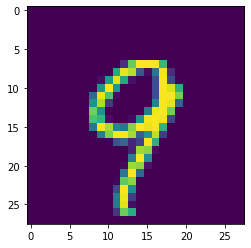

In [ ]:
plt.imshow(img)

In [ ]:
import numpy as np

In [ ]:
output = model.predict(np.array([img]))

In [ ]:
np.argmax(output, axis=1)

array([9])

In [ ]:
model.save("mnist_model")

INFO:tensorflow:Assets written to: mnist_model/assets


In [ ]:
!zip -r ./mnist_model.zip ./mnist_model/

  adding: mnist_model/ (stored 0%)
  adding: mnist_model/variables/ (stored 0%)
  adding: mnist_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: mnist_model/variables/variables.index (deflated 66%)
  adding: mnist_model/assets/ (stored 0%)
  adding: mnist_model/keras_metadata.pb (deflated 91%)
  adding: mnist_model/saved_model.pb (deflated 88%)


In [ ]:
import cv2

In [ ]:
cv2.imwrite("item.png", img)

True